# Classification on MNIST using the MultiLayer Perceptron (MLP)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
%matplotlib inline

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


We start by loading the MNIST data. Differently from before, we are not going to use scikitlearn to do that, but instead the Keras library. That's because we are going to move from "classic" methods to so-called *deep learning*, i.e. machine learning using deep neural networks.

Keras is built on top of Tensorflow, a framework for deep learning developed by Google which is probably the one most used by practitioners (PyTorch, developed at Facebook, is an alternative that has been gaining traction).

11493376/11490434 [==============================] - 18s 2us/step
no. of training/test samples: 60000, 10000
no. of features: 784


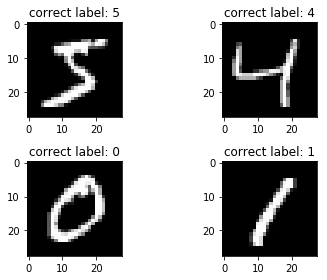

In [3]:
# Download the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("no. of training/test samples: %d, %d" % (X_train.shape[0], X_test.shape[0]))
print("no. of features: %d" % (np.product(X_train.shape[1:])))

# Let us look at some of the digits
fig, axs = plt.subplots(2, 2)
for d in range(4):
    axs[d % 2, d // 2].imshow(X_train[d], cmap="gray")
    axs[d % 2, d // 2].set_title("correct label: %d" % (y_train[d]))
fig.tight_layout()

Note that Keras loads MNIST in a slightly different way than scikitlearn: the data is already shuffled and split in training/test sets; moreover, each sample is a 2D array of dimension 28x28, instead of a 1D array of dimension 784.

We proceed by doing some preprocessing. We will *rasterize* these vectors, i.e. transform them from two-dimensional to one-dimensional arrays; moreover, we will normalize them, so that each component of the array is valued between 0 and 1, instead of 0 and 255.

In [4]:
# Rasterize and normalize samples
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train = X_train / 255
X_test = X_test / 255

# Use 32-bit instead of 64-bit float
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Work with one-hot encoding of labels
n_classes = len(np.unique(y_train))
y_train_b = keras.utils.to_categorical(y_train, n_classes)
y_test_b = keras.utils.to_categorical(y_test, n_classes)

print("The categories of the images above is now encoded as: \n", y_train_b[0:4])

The categories of the images above is now encoded as: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


It is now time to build our multi-layer neural network. First we shall do it with a single hidden layer.

In the code below we can see how it's easy to set up models in Keras. With just a few lines we have built a 2-layer neural network, and generalizing from this to more layers is quite simple.

In [5]:
# Specify model
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dense(n_classes, activation="softmax"))

# Print model and compile it
model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(),
              metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Note that the first dense layer has $784\times 512 + 512$ parameters, the second has $512 \times 10 + 10$. They correspond to the weights, plus a bias applied to each output.
We compile the model using the categorical cross entropy loss, and the RMSprop algorithm for optimization, described [here](http://ruder.io/optimizing-gradient-descent/index.html#rmsprop) together with other variants of gradient descent.

After setting up the model, we can train it just like we do in scikitlearn: by doing `model.fit(X_train, y_train)`.

In [ ]:
# Parameters
batch_size = 128
epochs = 20

# Perform fit
history = model.fit(X_train, y_train_b,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=False,
                    validation_data=(X_test, y_test_b))


# Print results
score = model.evaluate(X_test, y_test_b, verbose=0)
print('Test loss/accuracy: %g, %g' % (score[0], score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2600 - acc: 0.9250 - val_loss: 0.1614 - val_acc: 0.9485
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1085 - acc: 0.9679 - val_loss: 0.1048 - val_acc: 0.9672
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0717 - acc: 0.9792 - val_loss: 0.0925 - val_acc: 0.9715
Epoch 4/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0515 - acc: 0.9853 - val_loss: 0.0844 - val_acc: 0.9741
Epoch 5/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0379 - acc: 0.9899 - val_loss: 0.0850 - val_acc: 0.9752
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0279 - acc: 0.9927 - val_loss: 0.0812 - val_acc: 0.9778
Epoch 7/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0204 - acc: 0.9949 - val_loss: 0.0824 - val_acc

In [ ]:
plt.figure(figsize=(15, 5)) 
# Plot history for accuracy
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy -- MLP')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss -- MLP')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

This is actually pretty good, an accuracy of 2% was the state of the art for a long time (check it [here](http://yann.lecun.com/exdb/mnist/)). 

Just out of curiosity, [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html) is a detailed list of the best results people have been able to obtain on MNIST. The smallest test error achieved so far is of 0.21%, i.e. only 21 of the 10000 test samples are not classified correctly!

## Playing a bit with our MLP

There are many degrees of freedom both in our model and in the training procedure, that have been chosen more or less arbitrarily. For instance, why do we use these values for `batch_size` and `epochs`? Why do we use a ReLU activation on the 1st layer, and a softmax activation on the second? Why do we use this loss, this optimizer etc.

This is one of the main problem with deep learning: it is not clear in principle what approach is going to give the best result, and there are *many* possible approaches. So we just need to try many things and see what happens. 

We can do cross-validation, but the possibilities are so many that trying everything is just not feasible. So we need to develop a gut feeling on what's more appropriate for each situation -- sometimes theory can guide us, sometimes it can't.

We will now see how things change if we add dropout and batch normalization, take a more shallow network, or add a second layer. It seems however to be difficult to improve too much on the 2% performance with this approach.

### Adding dropout and batch normalization

Looking at the numbers printed on screen during training, we can see that our model was actually overfitting a lot: we get essentially 100% accuracy on the training set!

There are some tricks that have been introduced in order to handle this overfitting. The first one of them is called *dropout* (introduced [here](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)), and consists in, at each step of the training procedure, ignoring some of the features. This is more or less what we did when we looked at random forests: each of the trees in the forest worked with a subset of the features. So we can see dropout as a sort of bagging procedure which makes the model more robust. The difference is that dropout can be applied to each layer, not only to the first input layer.

The other trick is *batch normalization*, which consists in taking each sample in a mini-batch and standardizing it using the *mini-batch* mean and variance, see [here](https://arxiv.org/pdf/1502.03167.pdf) for details.

These tricks have been introduced mostly in a ad-hoc way -- people have some explanations on why they work, and have tried to do some theory about it, but in the end we still don't fully understand why and when they work (see [Ali Rahimi's provocative talk](https://www.youtube.com/watch?v=Qi1Yry33TQE)).

In [ ]:
from keras.layers import Dropout, BatchNormalization, Activation

# Parameters
batch_size = 128
epochs = 20

# Specify model
model = Sequential()

model.add(Dense(512, input_dim=784, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(n_classes, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("softmax"))

# Print model and compile it
model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(),
              metrics=["accuracy"])

# Perform fit
history_dropout = model.fit(X_train, y_train_b,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_b))


# Print results
score = model.evaluate(X_test, y_test_b, verbose=0)
print('Test loss/accuracy: %g, %g' % (score[0], score[1]))

In [ ]:
plt.figure(figsize=(15, 5)) 
# Plot history for accuracy
plt.subplot(121)
plt.plot(history_dropout.history['acc'])
plt.plot(history_dropout.history['val_acc'])
plt.title('model accuracy -- MLP with dropout and BN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(122)
plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.title('model loss -- MLP with dropout and BN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

### Trying other optimizers

We are using an optimizer known as RMSprop, which consists in a gradient descent with some extra terms involved. There are however other possibilities. Another optimizer based on gradient descent, Adam, has recently been introduced, and was shown to lead to very good results in practice.

Nice comparisons of different optimizers are available [here](http://ruder.io/optimizing-gradient-descent/) and [here](https://3dbabove.com/2017/11/14/optimizationalgorithms/).

In [ ]:
from keras.optimizers import adam

# Parameters
batch_size = 128
epochs = 20

# Specify model
model = Sequential()

model.add(Dense(512, input_dim=784, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(n_classes, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("softmax"))

# Print model and compile it
model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer=adam(),
              metrics=["accuracy"])

# Perform fit
history_adam = model.fit(X_train, y_train_b,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_b))


# Print results
score = model.evaluate(X_test, y_test_b, verbose=0)
print('Test loss/accuracy: %g, %g' % (score[0], score[1]))

In [ ]:
plt.figure(figsize=(15, 5)) 
# Plot history for accuracy
plt.subplot(121)
plt.plot(history_adam.history['acc'])
plt.plot(history_adam.history['val_acc'])
plt.title('model accuracy -- MLP using Adam')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(122)
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('model loss -- MLP using Adam')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

### Adding more layers

What if we just add another layer? Let's say it is identical to the first one (although it could be anything really -- the possibilities here are infinite!)

In [ ]:
# Parameters
batch_size = 128
epochs = 20

# Specify model
model = Sequential()

model.add(Dense(512, input_dim=784, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(512, input_dim=784, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(n_classes, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("softmax"))

# Print model and compile it
model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer=adam(),
              metrics=["accuracy"])

# Perform fit
history_onemorelayer = model.fit(X_train, y_train_b,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=False,
                    validation_data=(X_test, y_test_b))


# Print results
score = model.evaluate(X_test, y_test_b, verbose=0)
print('Test loss/accuracy: %g, %g' % (score[0], score[1]))

In [ ]:
plt.figure(figsize=(15, 5)) 
# Plot history for accuracy
plt.subplot(121)
plt.plot(history_onemorelayer.history['acc'])
plt.plot(history_onemorelayer.history['val_acc'])
plt.title('model accuracy -- MLP with three layers')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(122)
plt.plot(history_onemorelayer.history['loss'])
plt.plot(history_onemorelayer.history['val_loss'])
plt.title('model loss -- MLP with three layers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

As we can see, it's very hard to get past the 98.something% test accuracy. In order to do that we'll have to look into even more complicated models -- more specifically, layers other than the dense one. We'll do that on next class!